In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [ ]:
df_train.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB


In [ ]:
df_train.isnull().sum()

,0
id,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
sunshine,0


In [ ]:
df_train['rainfall'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2190 entries, 0 to 2189
Series name: rainfall
Non-Null Count  Dtype
--------------  -----
2190 non-null   int64
dtypes: int64(1)
memory usage: 17.2 KB


In [ ]:
df_train.corr()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
id,1.000000,0.153065,-0.008235,0.012590,0.014307,0.018708,0.006797,-0.029042,0.002226,-0.003022,-0.004223,0.020167,0.033674
day,0.153065,1.000000,0.005337,0.146294,0.153590,0.161475,0.137929,-0.074048,-0.048175,0.060936,0.024800,-0.000199,-0.000462
pressure,-0.008235,0.005337,1.000000,-0.800499,-0.816531,-0.814453,-0.817008,-0.119949,0.098600,-0.257163,-0.643293,0.266012,-0.049886
maxtemp,0.012590,0.146294,-0.800499,1.000000,0.982932,0.965529,0.906703,-0.072615,-0.289047,0.452387,0.662235,-0.354168,-0.079304
temparature,0.014307,0.153590,-0.816531,0.982932,1.000000,0.987150,0.933617,-0.025016,-0.249355,0.414019,0.668963,-0.342262,-0.049660
mintemp,0.018708,0.161475,-0.814453,0.965529,0.987150,1.000000,0.941342,0.009891,-0.219399,0.379497,0.663828,-0.328871,-0.026841
dewpoint,0.006797,0.137929,-0.817008,0.906703,0.933617,0.941342,1.000000,0.153390,-0.088446,0.249676,0.643073,-0.312179,0.081965
humidity,-0.029042,-0.074048,-0.119949,-0.072615,-0.025016,0.009891,0.153390,1.000000,0.584854,-0.541592,-0.012430,0.062285,0.454213
cloud,0.002226,-0.048175,0.098600,-0.289047,-0.249355,-0.219399,-0.088446,0.584854,1.000000,-0.805128,-0.127087,0.184698,0.641191
sunshine,-0.003022,0.060936,-0.257163,0.452387,0.414019,0.379497,0.249676,-0.541592,-0.805128,1.000000,0.272235,-0.241752,-0.555287


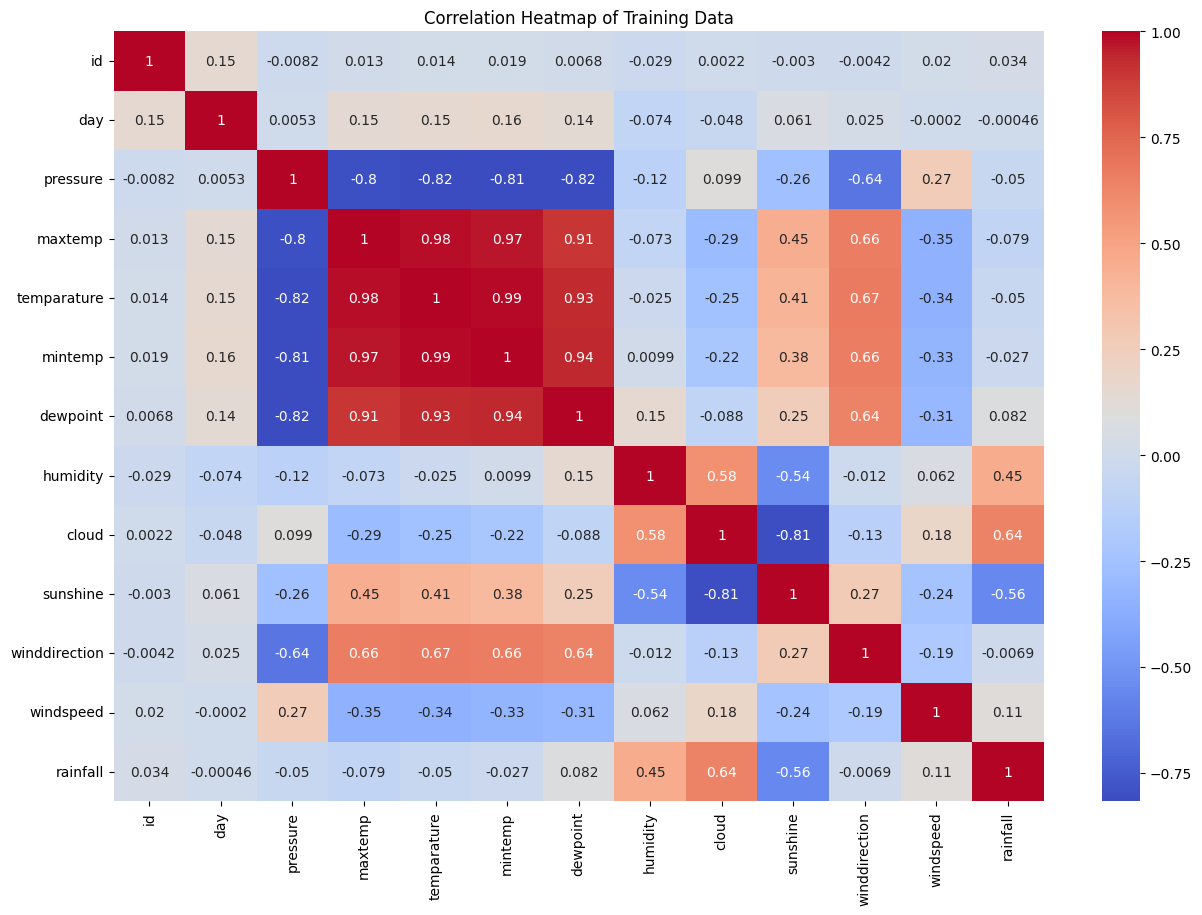

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Training Data')
plt.show()

In [ ]:
#corr with rainfall
df_train.corr()['rainfall']

,rainfall
id,0.033674
day,-0.000462
pressure,-0.049886
maxtemp,-0.079304
temparature,-0.049660
mintemp,-0.026841
dewpoint,0.081965
humidity,0.454213
cloud,0.641191
sunshine,-0.555287


In [ ]:
df_train.drop(columns=['id'],inplace=True)

In [ ]:
#IMPORT SVM
from sklearn.svm import SVC
svm=SVC(kernel='rbf')

In [ ]:
X=df_train.drop(columns=['rainfall'])
y=df_train['rainfall']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#import standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(X_test)

In [ ]:
model=svm.fit(x_train_scaled,y_train)

In [ ]:
#find accuray and loss
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
print(accuracy_score(y_test,model.predict(x_test_scaled)))
print(confusion_matrix(y_test,model.predict(x_test_scaled)))
print(classification_report(y_test,model.predict(x_test_scaled)))


0.8470319634703196
[[ 73  46]
 [ 21 298]]
              precision    recall  f1-score   support

           0       0.78      0.61      0.69       119
           1       0.87      0.93      0.90       319

    accuracy                           0.85       438
   macro avg       0.82      0.77      0.79       438
weighted avg       0.84      0.85      0.84       438



In [ ]:
#apply cross validation
from sklearn.model_selection import cross_val_score
model.fit(x_train_scaled,y_train)
scores=cross_val_score(model,x_train_scaled,y_train,cv=5)
print(scores)
print(np.mean(scores))

[0.85470085 0.86894587 0.88571429 0.89142857 0.85428571]
0.871015059015059


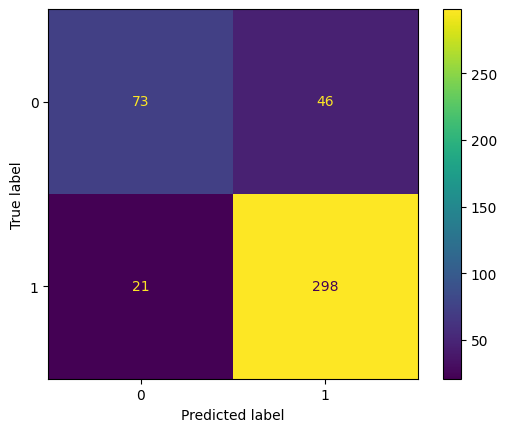

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test,model.predict(x_test_scaled))).plot()

In [ ]:
df_test.drop(columns=['id'],inplace=True)

In [ ]:
df_test.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            730 non-null    int64  
 1   pressure       730 non-null    float64
 2   maxtemp        730 non-null    float64
 3   temparature    730 non-null    float64
 4   mintemp        730 non-null    float64
 5   dewpoint       730 non-null    float64
 6   humidity       730 non-null    float64
 7   cloud          730 non-null    float64
 8   sunshine       730 non-null    float64
 9   winddirection  729 non-null    float64
 10  windspeed      730 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 62.9 KB


In [ ]:
df_test.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
sunshine,0
winddirection,1


In [ ]:
df_test.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
sunshine,0
winddirection,0


In [ ]:
df_test['windspeed']

In [ ]:
df_test['winddirection'].fillna(df_test['winddirection'].mean(), inplace=True)

In [ ]:
df_test_scaled=scaler.transform(df_test)

In [ ]:
df_test_pred=model.predict(df_test_scaled)

In [ ]:
#convert df_test in submission file
sub=pd.read_csv('sample_submission.csv')
submission=pd.DataFrame({'id':sub.index,'rainfall':df_test_pred})


In [ ]:
submission.to_csv('submission.csv',index=False)

<Axes: xlabel='rainfall', ylabel='count'>

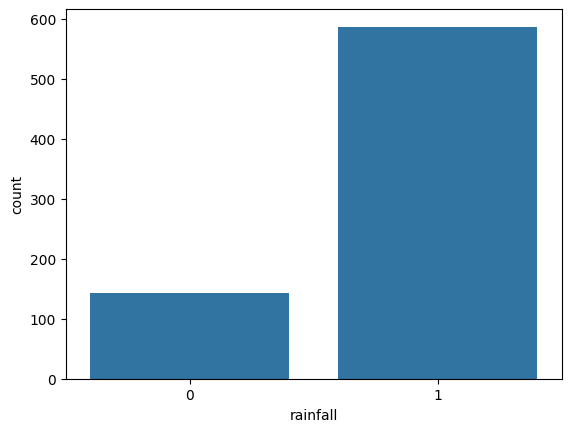

In [ ]:
#plot a count graph between sample submission file and submission file for right prediction
sns.countplot(x='rainfall',data=submission)


<Axes: xlabel='rainfall', ylabel='count'>

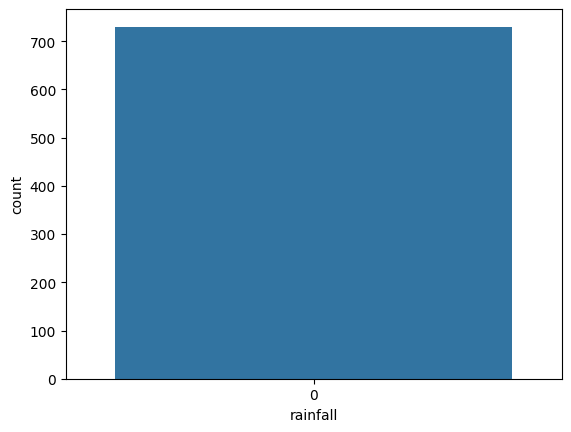

In [ ]:
sns.countplot(x='rainfall',data=sub)

To visualize support vectors, we typically plot the data in a 2D space with the decision boundary. Since the dataset has many features, we will select two features to create this visualization. We will use 'cloud' and 'humidity' for this example.

In [ ]:
from sklearn.svm import SVC

# Select two features for visualization
X_viz = df_train[['cloud', 'humidity']]
y_viz = df_train['rainfall']

# Scale the selected features
scaler_viz = StandardScaler()
X_viz_scaled = scaler_viz.fit_transform(X_viz)

# Train a new SVC model on the two features
model_viz = SVC(kernel='linear') # Using linear kernel for easier visualization
model_viz.fit(X_viz_scaled, y_viz)

# Get the support vectors
support_vectors = model_viz.support_vectors_

Now we can plot the data points, the decision boundary, and the support vectors.

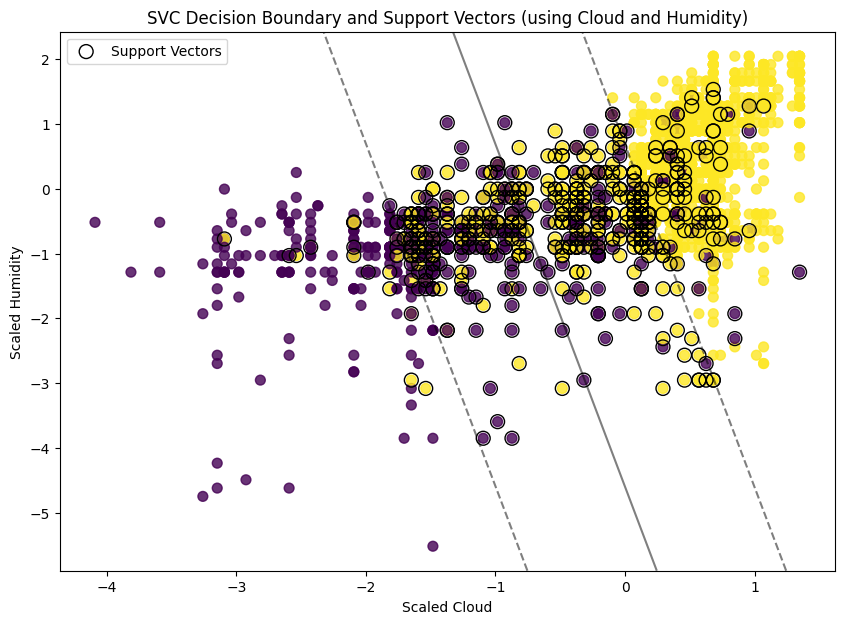

In [ ]:
# Plot the data points
plt.figure(figsize=(10, 7))
plt.scatter(X_viz_scaled[:, 0], X_viz_scaled[:, 1], c=y_viz, cmap='viridis', s=50, alpha=0.8)

# Plot the support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k', marker='o', label='Support Vectors')

# Plot the decision boundary (for linear kernel)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model_viz.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

plt.xlabel('Scaled Cloud')
plt.ylabel('Scaled Humidity')
plt.title('SVC Decision Boundary and Support Vectors (using Cloud and Humidity)')
plt.legend()
plt.show()

In [ ]:
df1=pd.read_csv('sample_submission.csv')
df1.shape
df1.head()
# df1.index

,id,rainfall
0,2190,0
1,2191,0
2,2192,0
3,2193,0
4,2194,0


In [ ]:
df=pd.read_csv('submission.csv')

In [ ]:
df.shape

(730, 2)

In [ ]:
#SUBMISSION 2 FILE
sub=pd.read_csv('sample_submission.csv')
submission=pd.DataFrame({'id':df1.id,'rainfall':df_test_pred})


In [ ]:
submission.to_csv('submission2.csv',index=False)